#  ¿Cómo se mueve un péndulo? 


> Se dice que un sistema cualquiera, mecánico, eléctrico, neumático, etc., es un oscilador armónico si, cuando se deja en libertad fuera de su posición de equilibrio, vuelve hacia ella describiendo oscilaciones sinusoidales, o sinusoidales amortiguadas en torno a dicha posición estable.
- https://es.wikipedia.org/wiki/Oscilador_armónico

Referencias: 
   - http://matplotlib.org
   - https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html
   - https://seaborn.pydata.org
   - http://www.numpy.org
   - http://ipywidgets.readthedocs.io/en/latest/index.html

**En realidad esto es el estudio de oscilaciones.**


<img style="float: left; margin: 0px 0px 15px 15px;" src="http://images.iop.org/objects/ccr/cern/51/3/17/CCast2_03_11.jpg" width="400px" height="100px" />


In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('k5yTVHr6V14')

Los sistemas mas sencillos a estudiar en oscilaciones son el sistema ` masa-resorte` y el `péndulo simple`. 

<div>
<img style="float: left; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/7/76/Pendulum.jpg" width="150px" height="50px" />
<img style="float: right; margin: 15px 15px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/ko/9/9f/Mass_spring.png" width="200px" height="100px" />
</div>

\begin{align}
\frac{d^2 x}{dt^2} +  \omega_{0}^2 x &= 0, \quad \omega_{0} = \sqrt{\frac{k}{m}}\notag\\
\frac{d^2 \theta}{dt^2} + \omega_{0}^{2}\, \theta &= 0, \quad\mbox{donde}\quad \omega_{0}^2 = \frac{g}{l} 
\end{align} 

___
## Sistema `masa-resorte`

La solución a este sistema `masa-resorte` se explica en términos de la segunda ley de Newton. Para este caso, si la masa permanece constante y solo consideramos la dirección en $x$. Entonces,
\begin{equation}
F = m \frac{d^2x}{dt^2}.
\end{equation}

¿Cuál es la fuerza? ** Ley de Hooke! **
\begin{equation}
F = -k x, \quad k > 0.
\end{equation}

Vemos que la fuerza se opone al desplazamiento y su intensidad es proporcional al mismo.  Y $k$ es la constante elástica o recuperadora del resorte. 

Entonces, un modelo del sistema `masa-resorte` está descrito por la siguiente **ecuación diferencial**:

\begin{equation}
\frac{d^2x}{dt^2} + \frac{k}{m}x = 0,
\end{equation}

cuya solución se escribe como 
\begin{equation}
x(t) = A \cos(\omega_{o} t) + B \sin(\omega_{o} t)
\end{equation}
Y su primera derivada (velocidad) sería 
\begin{equation}
\frac{dx(t)}{dt} = \omega_{0}[- A \sin(\omega_{0} t) + B\cos(\omega_{0}t)]
\end{equation}

### **¿Cómo se ven las gráficas de $x$ vs $t$ y $\frac{dx}{dt}$ vs $t$?** 

In [2]:
#Importar librerías
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
# Definición de funciones a graficar

# Parámetros
A, B, w0 = .5, .1, .5                     
# Creamos vector de tiempo de 0 a 50 con 100 puntos
t = np.linspace (0,50,100)                     
# Función de posición
x=A*np.cos(w0*t)+B*np.sin(w0*t)              
# Función de velocidad
y=w0*(-A*np.sin(w0*t)+B*np.cos(w0*t))      


Text(0.5,0,'$t$')

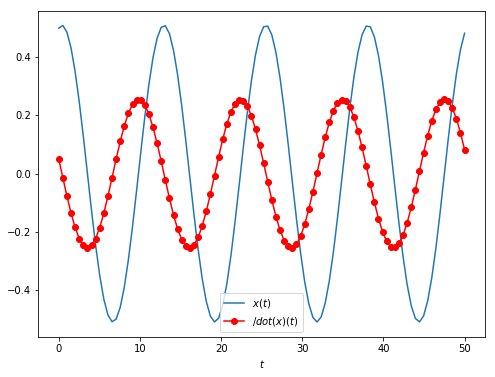

In [7]:
# Gráfico
plt.figure(figsize=(8,6))
plt.plot(t,x,'-',label='$x(t)$')
plt.plot(t,y,'ro-',label='$/dot(x)(t)$')
plt.legend (loc='best')
plt.xlabel('$t$')

Y si consideramos un conjunto de frecuencias de oscilación, entonces 

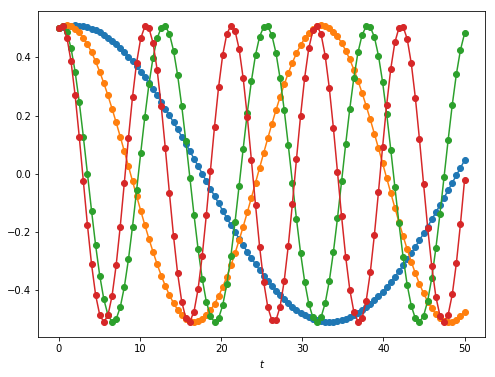

In [11]:
# Vector de diferentes frecuencias
frecuencias = np.array ([.1,.2,.5,.6])

# Ventana de gráfica con tamaño
plt.figure (figsize=(8,6))

# Graficamos para cada frecuencia
for w0 in frecuencias:
    x=A*np.cos(w0*t)+B*np.sin(w0*t)      
    plt.plot(t,x,'o-',label='$/omega_0=%s$'%w0)
    plt.xlabel ('$t$')

Si queremos tener manipular un poco mas las cosas, hacemos uso de lo siguiente:

In [ ]:
from ipywidgets import *

In [ ]:
def masa_resorte(t = 0):
    A, B, w0 = .5, .1, .5                            # Parámetros
    x = A*np.cos(w0*t)+B*np.sin(w0*t)                # Función de posición
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(x, [0],  'ko', ms = 10)
    ax.set_xlim(xmin = -0.6, xmax = .6)
    ax.axvline(x=0, color = 'r')
    ax.axhline(y=0, color = 'grey', lw = 1)
    fig.canvas.draw()

interact(masa_resorte, t = (0, 50,.01));

La opción de arriba generalmente será lenta, así que lo recomendable es usar `interact_manual`. 

In [ ]:
interact_manual(masa_resorte, t = (0, 50,.01));

___
## Péndulo simple
Ahora, si fijamos nuestra atención al movimiento de un péndulo simple _(oscilaciones pequeñas)_, la ecuación diferencial a resolver tiene la misma forma:

\begin{equation}
\frac{d^2 \theta}{dt^2} + \omega_{0}^{2}\, \theta = 0, \quad\mbox{donde}\quad \omega_{0}^2 = \frac{g}{l}.
\end{equation}

La diferencia más evidente es como hemos definido a $\omega_{0}$. Esto quiere decir que, 

\begin{equation}
\theta(t) = A\cos(\omega_{0} t) + B\sin(\omega_{0}t)
\end{equation}

Si graficamos la ecuación de arriba vamos a encontrar un comportamiento muy similar al ya discutido anteriormente. Es por ello que ahora veremos el movimiento en el plano $xy$. Es decir, 

\begin{align}
x &= l \sin(\theta), \quad
y = l \cos(\theta) 
\end{align}

In [ ]:
# Podemos definir una función que nos entregue theta dados los parámetros y el tiempo


In [ ]:
# Hacemos un gráfico interactivo del péndulo
def pendulo_simple(t = 0):
    fig = plt.figure(figsize = (5,5))
    ax = fig.add_subplot(1, 1, 1)
    x = 2 * np.sin(theta_t(.4, .6, 9.8, 2, t))
    y =  - 2 * np.cos(theta_t(.4, .6, 9.8, 2, t))
    ax.plot(x, y, 'ko', ms = 10)
    ax.plot([0], [0], 'rD')
    ax.plot([0, x ], [0, y], 'k-', lw = 1)
    ax.set_xlim(xmin = -2.2, xmax = 2.2)
    ax.set_ylim(ymin = -2.2, ymax = .2)
    fig.canvas.draw()
    
interact(pendulo_simple, t = (0, 10,.01));

### Plano fase  $(x, \frac{dx}{dt})$

$$ \frac{dx}{dt} = y $$

$$ \frac{dy}{dt} = -\frac{k}{m}x $$


In [ ]:
# Importamos función para integrar numéricamente ecuaciones diferenciales


In [ ]:
# Definir parámetros y condiciones iniciales

# Dominio temporal de 0 a 15 y paso de tiempo 0.01  (nuestro eje x)


In [ ]:
# Definimos el campo de la ecuación diferencial


In [ ]:
# Solución


In [ ]:
# extraer columnas y filas


In [ ]:
#Graficar


In [ ]:
#Graficar plano fase


### Multiples condiciones iniciales

In [ ]:
#Condiciones iniciales


In [ ]:
#Graficar
